# 課題（iLect上で提出してください）

## 機械学習の基礎（教師なし学習）

homework3などで扱った購買データを利用して以下の問いに答えて、課題を提出してください。（データの前処理は、以下の記載の通りに行ってください。）
    
講義資料の最後の総合問題で求めた最も支持度が高かった商品の2つの組み合わせについて、**リフト値**を求めてください。  
最も支持度が高かった商品の`"StockCode"`は、再度求める必要は無く、コード内で直接記入していただいて構いません。

提出するときは、以下の点に注意してください。  
>- 以下の関数homeworkの!!WRITE ME!!に処理を書いてください。(**「!!WRITE ME!!」は消して、記入してください。**)
>- 実際の提出は記述されたhomework関数全てになり、**提出場所はilect右上にある青字のHomeworkドロップダウンメニューからHomework 6を選んでください。Solutionに関数を貼り付けてからSaveを押してください。**
>- 前処理は以下のコードを使ってください。  
>- 返り値が数値型になるようにしてください。  

In [1]:
# common
import pandas as pd
import numpy as np

## init part(データの読み込みと前処理)
file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
online_retail_data = pd.ExcelFile(file_url)
online_retail_data_table = online_retail_data.parse('Online Retail')

online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x:str(x)[0])

# 数字があるものとIDがNullでないものが対象
target_online_retail_data_tb = online_retail_data_table[(online_retail_data_table.cancel_flg == '5') & (online_retail_data_table.CustomerID.notnull())]

target_online_retail_data_tb = target_online_retail_data_tb.assign(TotalPrice=target_online_retail_data_tb.Quantity * target_online_retail_data_tb.UnitPrice)

In [2]:
online_retail_data_table.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [3]:
list_all = list(target_online_retail_data_tb["StockCode"].value_counts())
# list_all

# trans["StockCode"].value_counts().index
IndexlistOver1000 = [target_online_retail_data_tb["StockCode"].value_counts().index[i] for i in range(len(list_all)) if list_all[i] > 1000]

# Index name(list) whose record number exceeds 1000.
print(IndexlistOver1000)
print("length of list:", len(IndexlistOver1000))
print(type(IndexlistOver1000))

['85123A', 22423, '85099B', 84879, 47566, 20725, 22720, 20727, 'POST', 23203, 22383, 22197, 21212, 23209, 23298, 22086, 22382]
length of list: 17
<class 'list'>


In [4]:
import itertools 

listof2 = []
for i in itertools.combinations(IndexlistOver1000, r=2):
    listof2.append(i)

# print(listof2)
print(len(listof2))
# Examples
print(type(listof2[1][0]), listof2[1][0])
print(type(listof2[1][1]), listof2[1][1])

136
<class 'str'> 85123A
<class 'str'> 85099B


Maximum support value: 0.027999568407423393
Its index number: 74
Index pair: (20725, 22383)


Text(0, 0.5, 'Support of A and B')

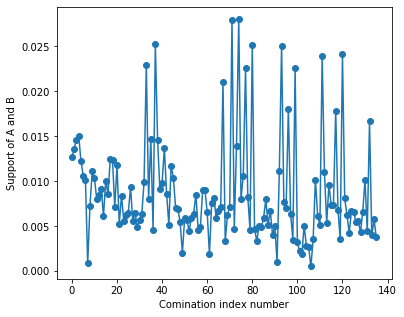

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

SupportAB = []
trans_all = set(target_online_retail_data_tb.InvoiceNo) 
for i in range(len(listof2)):
    trans_A = set(target_online_retail_data_tb[target_online_retail_data_tb["StockCode"]==listof2[i][0]].InvoiceNo)
    trans_B = set(target_online_retail_data_tb[target_online_retail_data_tb["StockCode"]==listof2[i][1]].InvoiceNo)
    trans_AB = trans_A&trans_B
    Support_AB = len(trans_AB) / len(trans_all)
    SupportAB.append(Support_AB)

print("Maximum support value:", np.max(SupportAB))
print("Its index number:", SupportAB.index(max(SupportAB)))
print("Index pair:", listof2[SupportAB.index(max(SupportAB))])

plt.figure(figsize=(6, 5))
plt.plot(SupportAB, marker="o")
plt.xlabel("Comination index number")
plt.ylabel("Support of A and B")

In [6]:
trans_all = set(target_online_retail_data_tb.InvoiceNo)
print(len(trans_all))
trans_a = set(target_online_retail_data_tb[target_online_retail_data_tb['StockCode']=="85123A"].InvoiceNo)
print("Data length of trans_a:          ", len(trans_a))
trans_b = set(target_online_retail_data_tb[target_online_retail_data_tb['StockCode']=='85099B'].InvoiceNo)
print("Data length of trans_b:          ", len(trans_b))
trans_ab = trans_a&trans_b
print("Data length of trans_a & trans_b:", len(trans_ab))

18536
Data length of trans_a:           1978
Data length of trans_b:           1600
Data length of trans_a & trans_b: 252


In [7]:
confidence = len(trans_ab) / len(trans_a)
support_b = len(trans_b) / len(trans_all)

print(confidence)
print(support_b)

0.12740141557128412
0.08631851532153648


In [8]:
lift = confidence / support_b
lift

1.4759453993933265

In [9]:
# working place. everything 
def homework(target_online_retail_data_tb):
    trans_all = set(target_online_retail_data_tb.InvoiceNo)
    trans_a = set(target_online_retail_data_tb[target_online_retail_data_tb['StockCode']==int(20725)].InvoiceNo)
    trans_b = set(target_online_retail_data_tb[target_online_retail_data_tb['StockCode']==int(22383)].InvoiceNo)
    trans_ab = trans_a&trans_b
    confidence = len(trans_ab) / len(trans_a)
    support_b = len(trans_b) / len(trans_all)  

    my_result = confidence / support_b 
    return my_result  

In [10]:
homework(target_online_retail_data_tb)

7.155601605739843